**Flight Ticket Price Prediction**

**Source** https://www.machinehack.com/course/predict-the-flight-ticket-price-hackathon/

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

SIZE:
Size of training set: 10683 records

Size of test set: 2671 records

**FEATURES**:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket (Target)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train_data=pd.read_excel("Data_Train.xlsx")
test_data=pd.read_excel("Test_set.xlsx")

In [11]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [12]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [13]:
print("Training data shape:")
train_data.shape


Training data shape:


(10683, 11)

In [14]:
print("Testing data shape:")
test_data.shape

Testing data shape:


(2671, 10)

In [0]:
final_data=train_data.append(test_data,sort=False)

In [16]:
final_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [17]:
final_data.shape

(13354, 11)

In [18]:
final_data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

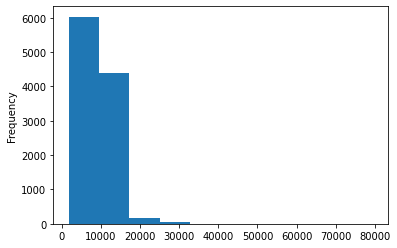

In [19]:
final_data['Price'].plot.hist()

**Feature Engineering**

In [0]:
#Splitting Date Feature into Date,Month,Year
final_data['Date']=final_data['Date_of_Journey'].str.split('/').str[0].astype(int)
final_data['Month']=final_data['Date_of_Journey'].str.split('/').str[1].astype(int)
final_data['Year']=final_data['Date_of_Journey'].str.split('/').str[2].astype(int)

In [0]:
final_data=final_data.drop(['Date_of_Journey'],axis=1)

In [22]:
final_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [23]:
final_data.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [0]:
final_data.dropna(subset=['Route','Total_Stops'],inplace=True)

In [25]:
final_data.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [0]:
# Converting TotalStops feature into stops(int)
final_data['Total_Stops']=final_data['Total_Stops'].replace('non-stop',"0 stop")
final_data['Stops']=final_data['Total_Stops'].str.split(' ').str[0].astype(int)

In [0]:
final_data=final_data.drop(['Total_Stops'],axis=1)

In [28]:
final_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


In [29]:
final_data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [0]:
#Converting Arrival Time feature into arrival hour,arrival minute
final_data['Arrival_Time']=final_data['Arrival_Time'].str.split(' ').str[0]
final_data['Arrival_Hour']=final_data['Arrival_Time'].str.split(':').str[0].astype(int)
final_data['Arrival_Minute']=final_data['Arrival_Time'].str.split(':').str[1].astype(int)
final_data=final_data.drop(['Arrival_Time'],axis=1)

In [31]:
final_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,24,3,2019,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [0]:
#Converting Departure Time feature into Departure hour,Departure minute
final_data['Dep_Hour']=final_data['Dep_Time'].str.split(':').str[0].astype(int)
final_data['Dep_Minute']=final_data['Dep_Time'].str.split(':').str[1].astype(int)
final_data=final_data.drop(['Dep_Time'],axis=1)

In [33]:
final_data.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


In [0]:
final_data['Price'].fillna((final_data['Price'].mean()),inplace=True)

In [0]:
final_data=final_data.drop(['Route','Duration'],axis=1)

In [36]:
final_data.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50


**Encoding**

In [0]:
lb=LabelEncoder()
final_data['Airline']=lb.fit_transform(final_data['Airline'])
final_data['Source']=lb.fit_transform(final_data['Source'])
final_data['Destination']=lb.fit_transform(final_data['Destination'])
final_data['Additional_Info']=lb.fit_transform(final_data['Additional_Info'])

In [0]:
train=final_data[0:10683]
test=final_data[10683:]

In [0]:
X=train.drop(['Price'],axis=1)
y=train.Price

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [42]:
X_train.head()

,Airline,Source,Destination,Additional_Info,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
7106,8,0,2,8,6,4,2019,0,8,35,5,55
7904,1,2,1,8,1,6,2019,1,6,50,5,15
4861,4,2,1,5,12,6,2019,2,12,35,14,35
9376,4,0,5,5,18,3,2019,1,20,20,14,5
155,1,3,0,8,9,5,2019,2,7,55,8,20


**Feature Selection**

In [0]:
from sklearn.feature_selection import SelectFromModel

In [0]:
mod=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [0]:
mod.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [0]:
sel_feat=X_train.columns[(mod.get_support())]

In [0]:
sel_feat

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stops', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour', 'Dep_Minute'],
      dtype='object')

In [0]:
# As we can see year feature in not inportant we will remove it 
X_train=X_train.drop(['Year'],axis=1)
X_test=X_test.drop(['Year'],axis=1)

In [0]:
X_train.head()

,Airline,Source,Destination,Additional_Info,Date,Month,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
7106,8,0,2,8,6,4,0,8,35,5,55
7904,1,2,1,8,1,6,1,6,50,5,15
4861,4,2,1,5,12,6,2,12,35,14,35
9376,4,0,5,5,18,3,1,20,20,14,5
155,1,3,0,8,9,5,2,7,55,8,20


In [0]:
X_test.head()


,Airline,Source,Destination,Additional_Info,Date,Month,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
9694,8,0,2,8,15,6,0,8,35,5,55
9826,2,0,5,8,3,3,0,23,50,20,55
7702,1,3,0,8,6,6,2,20,25,5,50
1437,4,0,5,8,6,3,1,14,25,9,45
6828,3,2,1,8,15,6,1,1,30,16,0


**Random Forest Regressor**

In [0]:
# Finding  Best Hyperparameters

n_estimators=[500,900]
max_features=['auto','sqrt']
max_depth=[int(i) for i in np.linspace(start=5,stop=30,num=6)]
min_samples_leaf=[1,2,5,10]
min_samples_split=[2, 5, 10, 15, 100]


In [0]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [0]:
Rf=RandomForestRegressor()
Rfmodel=RandomizedSearchCV(estimator=Rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=50,cv=5,verbose=2,random_state=0,n_jobs=1)

In [0]:
Rfmodel.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=5, total=   5.6s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=5, total=   5.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=5, total=   5.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=5, total=   5.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=5, total=   5.6s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=500, min_samples_split=10, min_s

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 22.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [0]:
y_pred=Rfmodel.predict(X_test)

In [0]:
y_pred.shape

(3205,)

In [0]:
y_test.shape

(3205,)

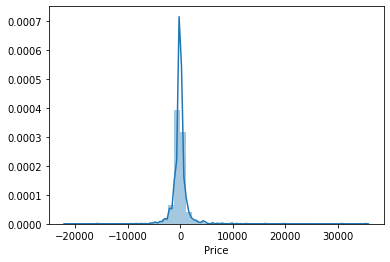

In [0]:
sns.distplot(y_test-y_pred)

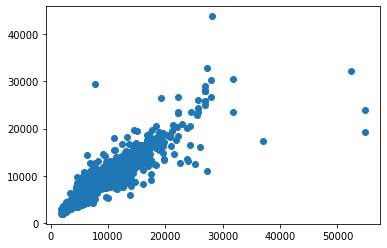

In [0]:
plt.scatter(y_test,y_pred)

In [0]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.8649107386155329

**Linear Regression**

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [0]:
X_train=X_train.drop(['Year'],axis=1)
X_test=X_test.drop(['Year'],axis=1)

In [0]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)


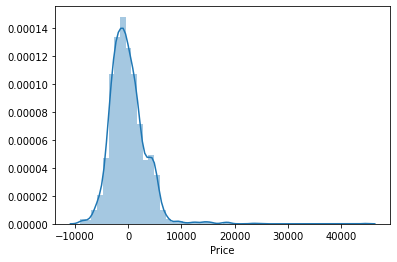

In [55]:
sns.distplot(y_test-y_pred)

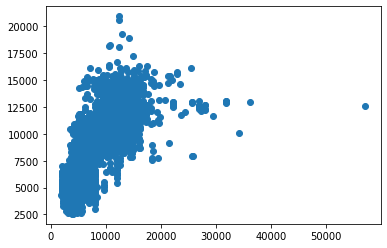

In [56]:
plt.scatter(y_test,y_pred)

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.44190698374355164

In [0]:
Acc_comp={'Random Forest':0.86,
          'Linear Regression':0.44
          }

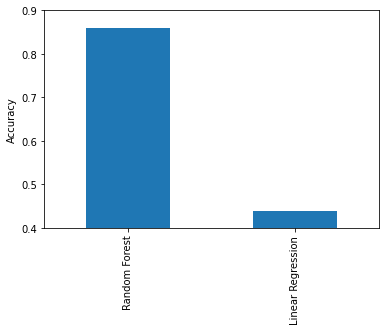

In [62]:
pd.Series(Acc_comp).plot(kind='bar')
plt.ylabel("Accuracy")
plt.ylim((0.40,0.90))
plt.show()

**Conclusion**

As we can clearly see that **Random Forest** Performs Better Than **Linear Regression**.

**Resources**


1.   https://github.com/krishnaik06/Flight-Price-Prediction
2.   https://www.machinehack.com/course/predict-the-flight-ticket-price-hackathon/

3.  https://www.geeksforgeeks.org/  

